## Data Features

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

## The students are classified into three numerical intervals based on their total grade/mark:

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

data = pd.read_csv('xAPI-Edu-Data.csv') #columns = ['Gender','Nationality', 'PlaceofBirth','StageID','GradeID','SectionID'
                                              #,'Topic','Semester','Relation','RaisedHands','VisitedResources'
                                              #,'AnnoucementsView','Discussion','ParentAnsweringSurvey',
                                              #'ParentSchoolSatisfaction','StudentAbsenceDays','Class/FinalGrade'])

print (data.shape)

    
data.head()


(480, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


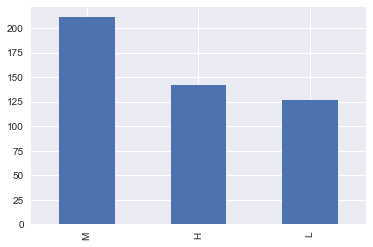

In [221]:
data.Class.value_counts().plot(kind='bar')


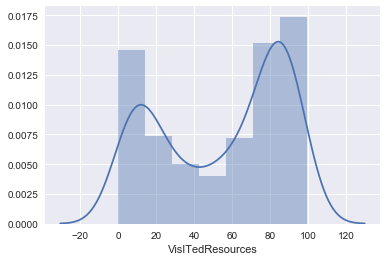

In [38]:
sns.distplot(data['VisITedResources'])

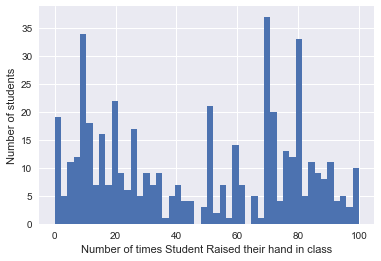

In [24]:
%matplotlib inline


plt.hist(data['raisedhands'], bins = 48)
plt.xlabel("Number of times Student Raised their hand in class")
plt.ylabel("Number of students")


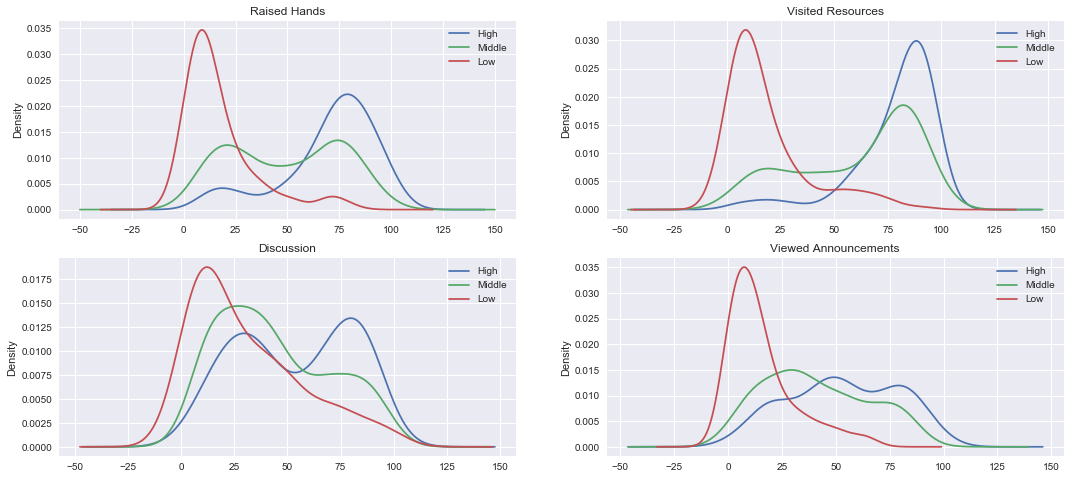

In [61]:

fig = plt.figure(figsize=(18,8))

plt.subplot(221)
data.raisedhands[data.Class == 'H'].plot(kind='kde') 
data.raisedhands[data.Class == 'M'].plot(kind='kde') 
data.raisedhands[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best') 
plt.title('Raised Hands')


plt.subplot(222)
data.VisITedResources[data.Class == 'H'].plot(kind='kde') 
data.VisITedResources[data.Class == 'M'].plot(kind='kde') 
data.VisITedResources[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best') 
plt.title('Visited Resources')


plt.subplot(223)
data.Discussion[data.Class == 'H'].plot(kind='kde') 
data.Discussion[data.Class == 'M'].plot(kind='kde') 
data.Discussion[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best')
plt.title('Discussion')

plt.subplot(224)
data.AnnouncementsView[data.Class == 'H'].plot(kind='kde') 
data.AnnouncementsView[data.Class == 'M'].plot(kind='kde') 
data.AnnouncementsView[data.Class == 'L'].plot(kind='kde') 
plt.legend(('High', 'Middle','Low'),loc='best')
plt.title('Viewed Announcements')


In [4]:
raised_hands = data['raisedhands']
discussion = data['Discussion']
v_resources = data['VisITedResources']
v_announcements = data['AnnouncementsView']

def correlation(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

print (correlation(raised_hands, discussion))

print (correlation(raised_hands, v_resources))

print (correlation(v_resources, discussion))

0.3393859910133952
0.6915717054692965
0.24329176916115017


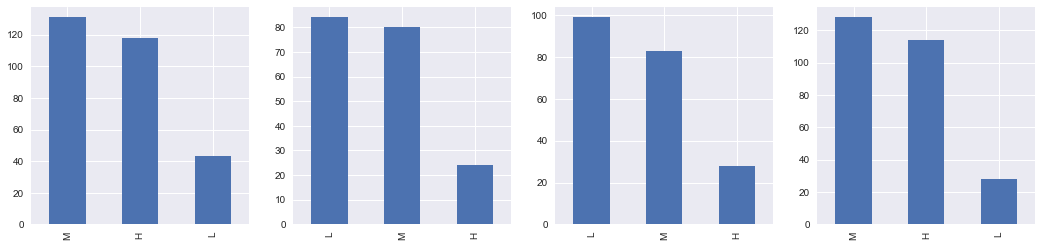

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,4))

plt.subplot(141)
good_sat= data.Class[data.ParentschoolSatisfaction== 'Good'].value_counts()
good_sat.plot(kind='bar')

plt.subplot(142)
bad_sat = data.Class[data.ParentschoolSatisfaction== 'Bad'].value_counts()
bad_sat.plot(kind='bar')

plt.subplot(143)
survey_no = data.Class[data.ParentAnsweringSurvey == 'No'].value_counts()
survey_no.plot(kind='bar')

plt.subplot(144)
survey_yes = data.Class[data.ParentAnsweringSurvey == 'Yes'].value_counts()
survey_yes.plot(kind='bar')

In [65]:
data.pivot_table('raisedhands',index = ['ParentschoolSatisfaction','Relation'], 
                 columns = 'Class', aggfunc = 'sum')

Class                                 H     L     M
ParentschoolSatisfaction Relation                  
Bad                      Father     587  1270  2482
                         Mum       1211    96  1008
Good                     Father    2236   444  3574
                         Mum       5947   335  3262

Class            H     L     M
PlaceofBirth                  
Egypt          3.0   3.0   3.0
Iran           NaN   2.0   4.0
Iraq          14.0   NaN   8.0
Jordan        53.0  34.0  89.0
KuwaIT        35.0  69.0  76.0
Lybia          NaN   6.0   NaN
Morocco        1.0   1.0   2.0
Palestine      6.0   NaN   4.0
SaudiArabia    7.0   4.0   5.0
Syria          2.0   1.0   3.0
Tunis          3.0   3.0   3.0
USA            6.0   2.0   8.0
lebanon       11.0   2.0   6.0
venzuela       1.0   NaN   NaN


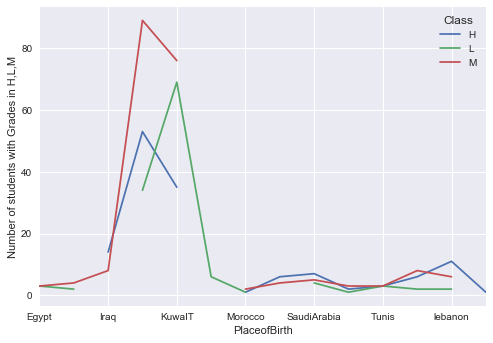

In [20]:
grades_count = data.groupby(['PlaceofBirth','Class'])['Class'].aggregate('count').unstack()
print (grades_count)
sns.set()
grades_count.plot()
plt.ylabel('Number of students with Grades in H,L,M')


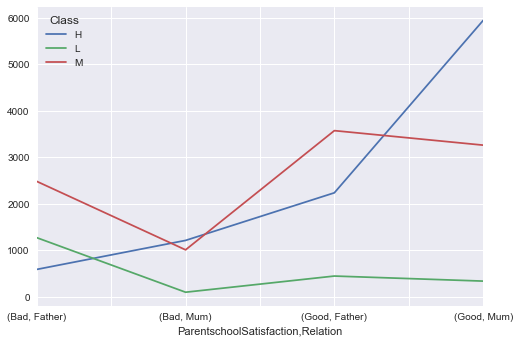

In [7]:
data.pivot_table('raisedhands',index = ['ParentschoolSatisfaction','Relation'], 
                 columns = 'Class', aggfunc = 'sum').plot()

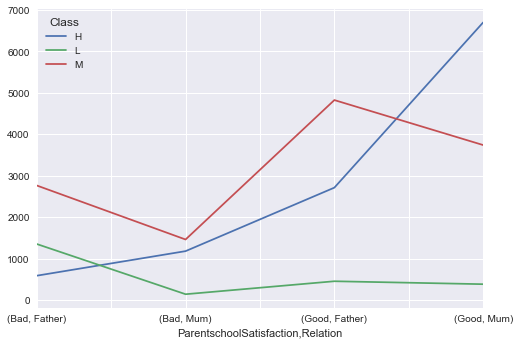

In [8]:
data.pivot_table('VisITedResources',index = ['ParentschoolSatisfaction','Relation'], 
                 columns = 'Class', aggfunc = 'sum').plot()

0    50
1    50
2    10
3    10
4    50
Name: Class, dtype: int64
VisITedResources
0     4.285714
1     5.000000
2    15.900000
3     9.600000
4    19.400000
Name: raisedhands, dtype: float64


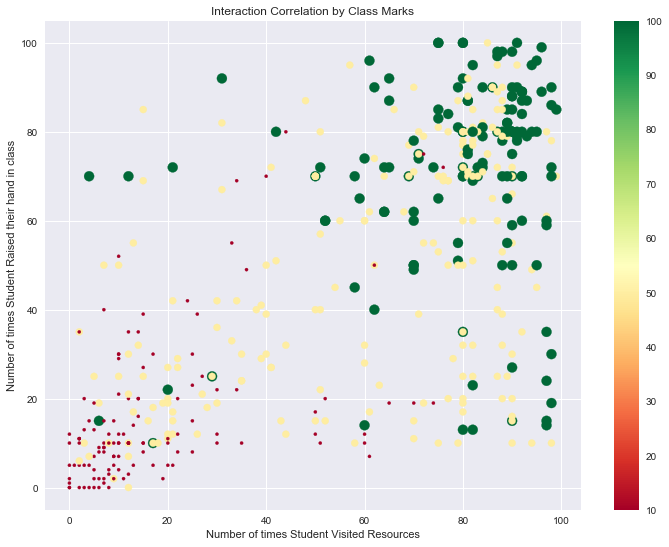

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def new_grade(grade):
    if grade == 'H':
        return 100
    elif grade == 'M':
        return 50
    elif grade == 'L':
        return 10
    
def new_grades(grades): 
    return grades.apply(new_grade)

print (new_grades(data['Class']).head())

converted_grades = new_grades(data['Class'])

resources_to_raisedhands = data.groupby('VisITedResources').mean()['raisedhands'].head()
print (resources_to_raisedhands)


fig = plt.figure(figsize=(12, 9))
plt.scatter(data['VisITedResources'], data['raisedhands'],c= converted_grades, s = converted_grades, cmap = 'RdYlGn')
plt.ylabel("Number of times Student Raised their hand in class")
plt.xlabel("Number of times Student Visited Resources")
plt.title ('Interaction Correlation by Class Marks')
plt.colorbar()



In [10]:
import pandas as pd
import seaborn as sns
%pylab inline

data.groupby('Class').aggregate(['min', np.median, np.mean, max])



Populating the interactive namespace from numpy and matplotlib


raisedhands                        VisITedResources                    \
              min median       mean  max              min median       mean   
Class                                                                         
H              10     75  70.288732  100                4     84  78.746479   
L               0     10  16.889764   80                0     11  18.322835   
M               0     50  48.938389  100                2     72  60.635071   

          AnnouncementsView                       Discussion         \
      max               min median       mean max        min median   
Class                                                                 
H      99                 2     52  53.380282  98          2     54   
L      90                 0     11  15.574803  66          1     21   
M      99                 0     38  40.962085  93          3     40   

                      
            mean max  
Class                 
H      53.661972  99  
L      30.834646  98  
M      43.791469  98

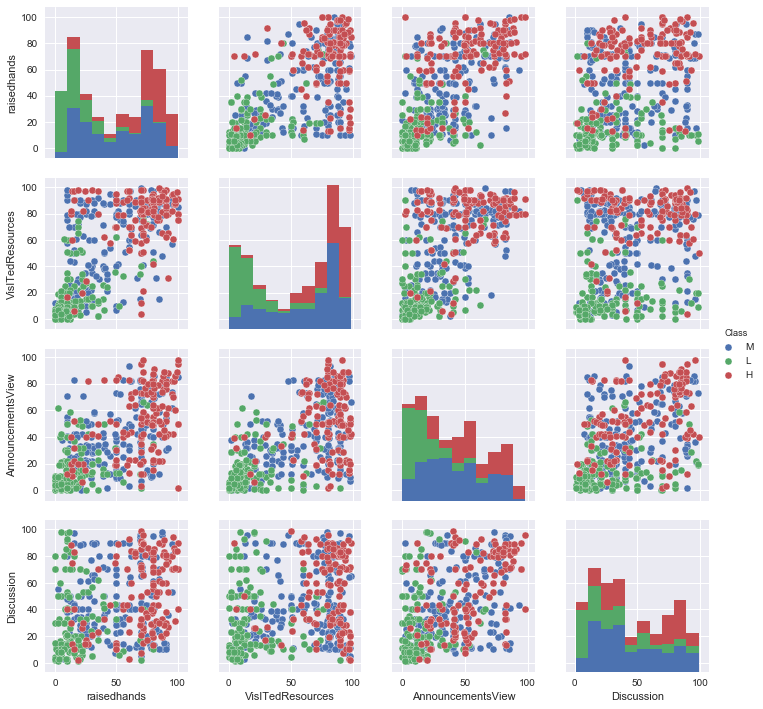

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploring correlations between multidimensional data/plot all pairs of values against each other

sns.pairplot(data, hue='Class', size=2.5);


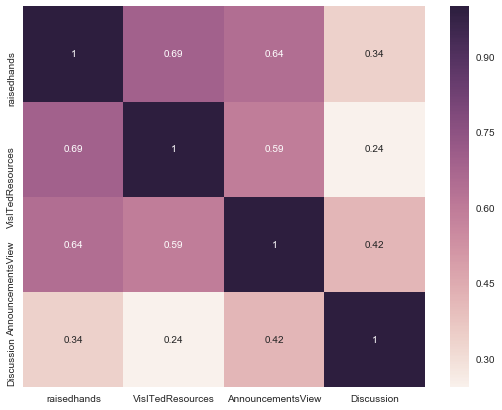

In [28]:
fig,ax= plt.subplots(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)


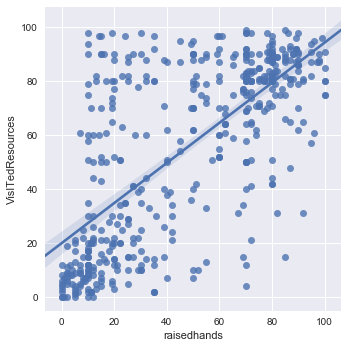

In [135]:
sns.lmplot(x="raisedhands", y="VisITedResources", data=data)
sns.plt.show()

In [91]:
data_dummies = pd.get_dummies(data, columns = ['Class','ParentschoolSatisfaction'])

data_dummies.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays,Class_H,Class_L,Class_M,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Under-7,0,0,1,0,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Under-7,0,0,1,0,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Above-7,0,1,0,1,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Above-7,0,1,0,1,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Above-7,0,0,1,1,0


In [150]:
# LOGISTIC REGRESSION on y target: Class_H

feature_cols = ['raisedhands', 'VisITedResources', 'ParentschoolSatisfaction_Bad',  
                'ParentschoolSatisfaction_Good']

X = data_dummies[feature_cols]
y = data_dummies.Class_H

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)


# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_pred_class, y_test))

print('Misclassified samples: %d' % (y_test != y_pred_class).sum())

0.708333333333
Misclassified samples: 28


In [204]:
# Decision Trees on full Categorical Classifaction of H, M, L

feature_cols = ['raisedhands', 'VisITedResources', 'ParentschoolSatisfaction_Bad',  
                'ParentschoolSatisfaction_Good']

X = data_dummies[feature_cols]
y = data.Class
#using the mutliple categorical values for Y target 


# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print (accuracy_score(y_pred, y_test))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

0.5625
Misclassified samples: 42


In [169]:
#ADABOOST on y target: Class_H ----best score so far

feature_cols = ['raisedhands', 'VisITedResources', 'ParentschoolSatisfaction_Bad',  
                'ParentschoolSatisfaction_Good']

X = data_dummies[feature_cols]
y = data_dummies.Class_H

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)


y_2 = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_2, y_test))
print('Misclassified samples: %d' % (y_test != y_2).sum())

0.75
Misclassified samples: 24


In [222]:
#Preprocessing data to encode categorical values for the y-target column


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.Class)
target = le.transform(data.Class)



In [217]:
#K NEAREST NEIGHBORS FOR ALL 3 CLASSES: H, L, M --- best score so far = 66% accuracy 


feature_cols = ['raisedhands', 'VisITedResources', 'ParentschoolSatisfaction_Bad',  
                'ParentschoolSatisfaction_Good']

X = data_dummies[feature_cols]
y = target

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=6, n_jobs =5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score

print (accuracy_score(pred, y_test))



0.614583333333


[0.53125, 0.57291666666666663, 0.55208333333333337, 0.54166666666666663, 0.51041666666666663, 0.53125, 0.53125, 0.5625, 0.55208333333333337, 0.57291666666666663, 0.60416666666666663, 0.55208333333333337, 0.5625, 0.54166666666666663, 0.58333333333333337, 0.61458333333333337, 0.60416666666666663, 0.61458333333333337, 0.60416666666666663, 0.58333333333333337, 0.61458333333333337, 0.59375, 0.59375, 0.60416666666666663, 0.59375]


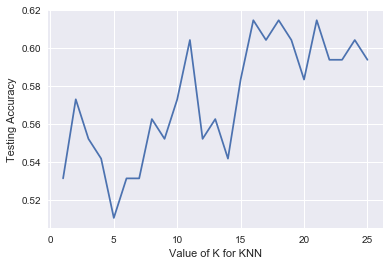

In [210]:
#FINDING BEST VALUE FOR K 

k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [197]:
# RANDOM FOREST CLASSIFIER model 

feature_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentschoolSatisfaction_Bad',  
                'ParentschoolSatisfaction_Good']

X = data_dummies[feature_cols]
y = data.Class

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train) 

pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

print (accuracy_score(pred, y_test))

0.604166666667
